In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To supress warnings

In [2]:
# Read the dataset
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data.shape

(660, 7)

There are 660 records, and 7 columns in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# Check for duplicate data

data.duplicated().sum()

0

#### **Observations**

1. There are 660 observations and 7 columns in the dataset.
2. All columns have 660 non-null values i.e. there are no missing values.
3. All columns are of int64 data type.
4. Data contains no duplicate values.

In [7]:
#figure out the uniques in each column
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values.

In [8]:
# Identify the duplicated customer keys
duplicate_keys = data.duplicated('Customer Key') == True
duplicate_keys

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

In [9]:
# Drop duplicated keys
data = data[duplicate_keys == False]

In [10]:
# drop the columns that is not needed for the Analysis
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [11]:
data.shape

(655, 5)

### Observation

- After removing duplicated keys and rows and unnecessary columns, there are 655 unique observations and 5 columns in our data.

## Exploratory Data Analysis

In [12]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


**Summary Statistics**

In [13]:
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,655.000000,655.000000,655.000000,655.000000,655.000000
mean,34242.748092,4.691603,2.401527,2.606107,3.601527
std,37240.896986,2.169325,1.633648,2.940380,2.867352
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


- Credit limit average is around 35K with 50% of customers having a credit limit less than 18K, which implies a high positive skewness.

### Univariate Analysis

#### **Distribution Plot**

<Axes: xlabel='Avg_Credit_Limit', ylabel='Density'>

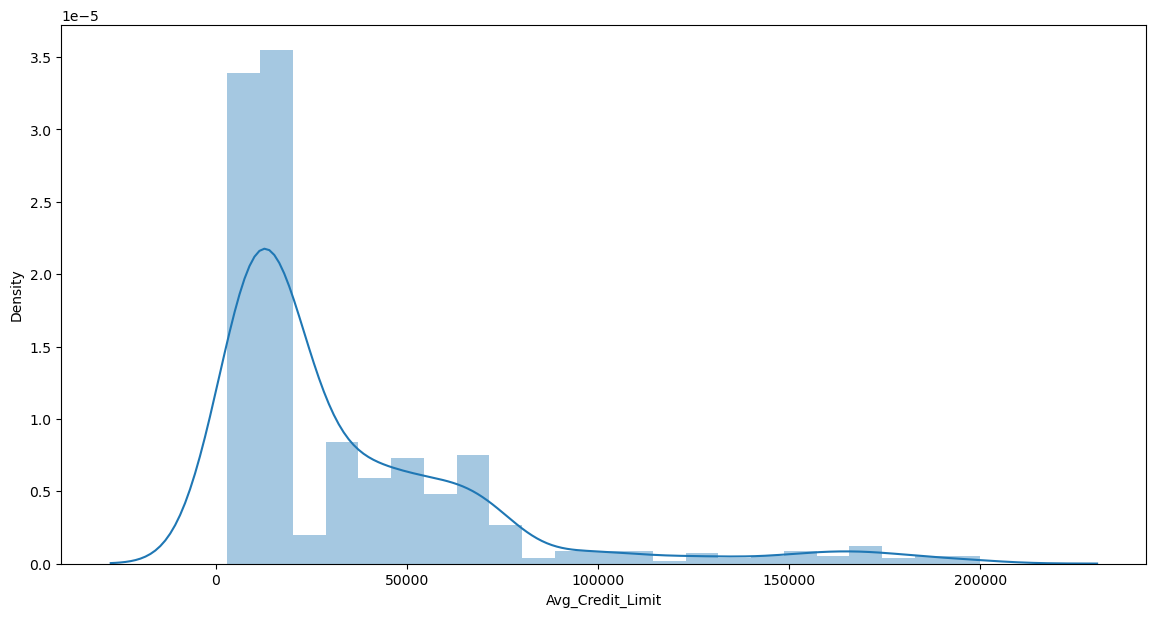

In [14]:
plt.figure(figsize = (14, 7))
sns.distplot(data['Avg_Credit_Limit'])

<Axes: >

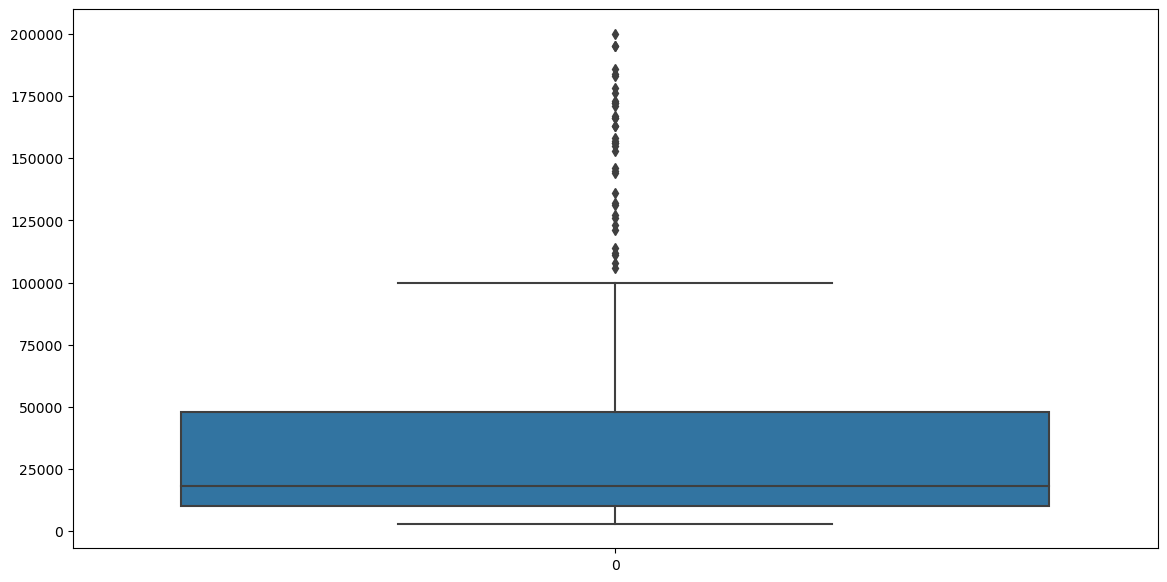

In [15]:
plt.figure(figsize = (14, 7))
sns.boxplot(data['Avg_Credit_Limit'])

*The Average Credit Limit is right skewed with a lot of outliers.*

In [16]:
data.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

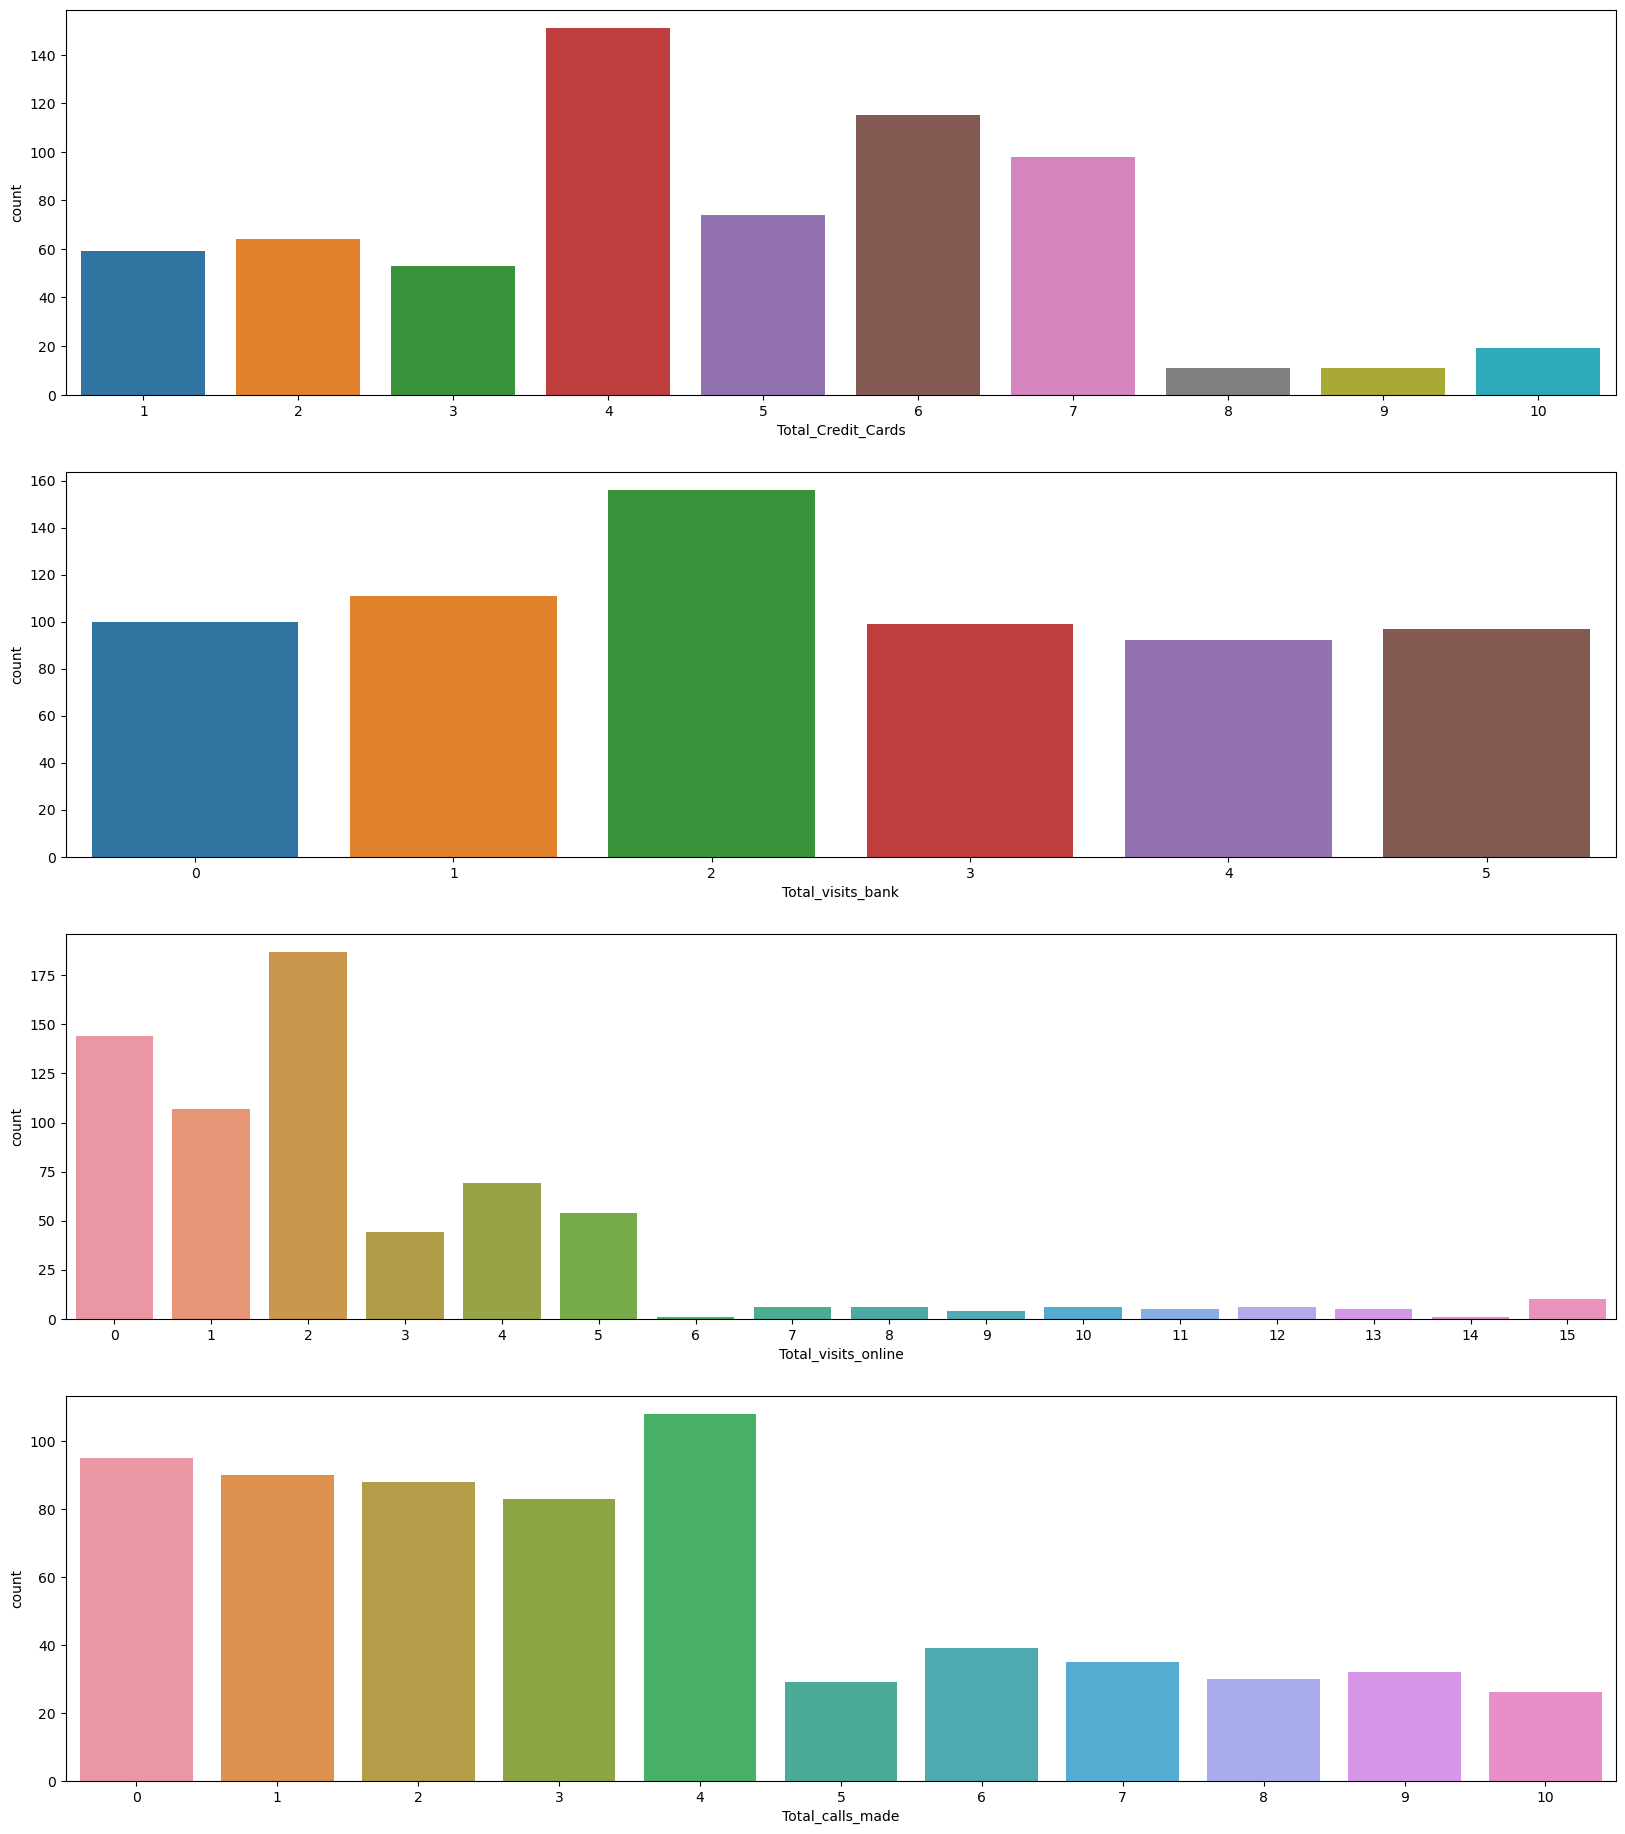

In [17]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 23))

cols_ = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=data, ax=ax[ind])

### Observations

1. The above graph shows that the maximum customers have 4 credit cards.
2. Majority of customers visited bank for 2 times.
3. Majority of customers visited bank online for 2 times followed by 0 times.
4. Maximum customers have made 4 calls followed by no calls and 1 call.

### Multi-variate Analysis

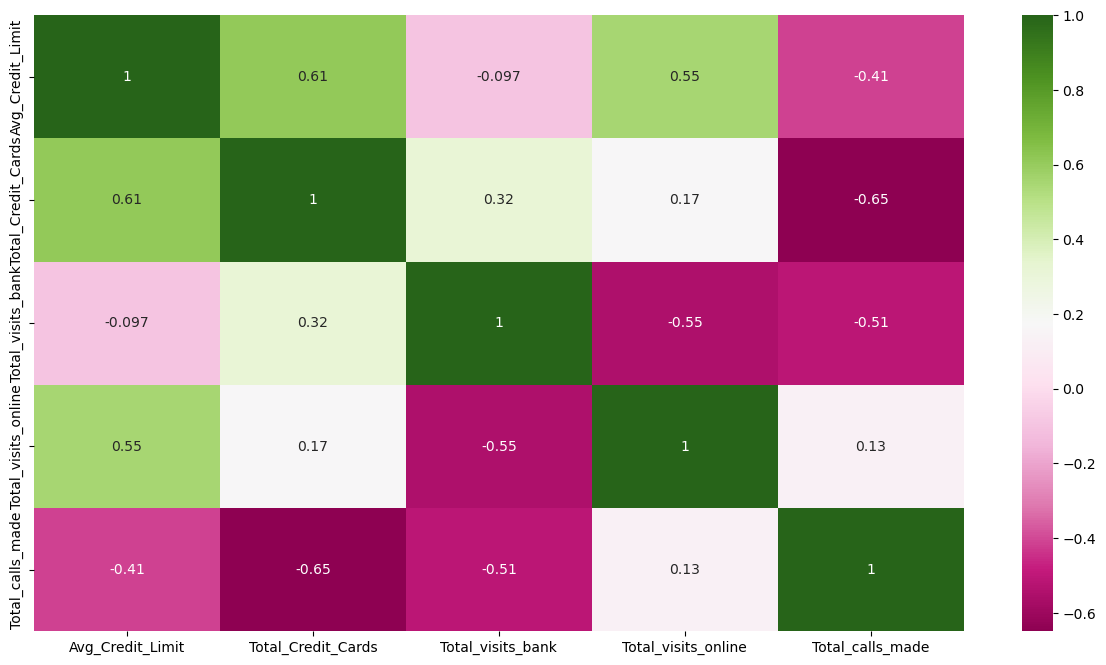

In [18]:
plt.figure(figsize=(15,8))

sns.heatmap(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), 
            annot=True, cmap="PiYG");

#### Observations

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and
Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.
- Total credit cards and Total calls made are negatively correlated with each other.

## Data Preprocessing

### **Outlier Detection & Handling**

In [20]:
# Outlier Detection For Average Credit Limit

Q1 = data['Avg_Credit_Limit'].quantile(0.25)
Q3 = data['Avg_Credit_Limit'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Avg_Credit_Limit'] >= Q1 - 3*IQR) & (data['Avg_Credit_Limit'] <= Q3 + 3*IQR)]

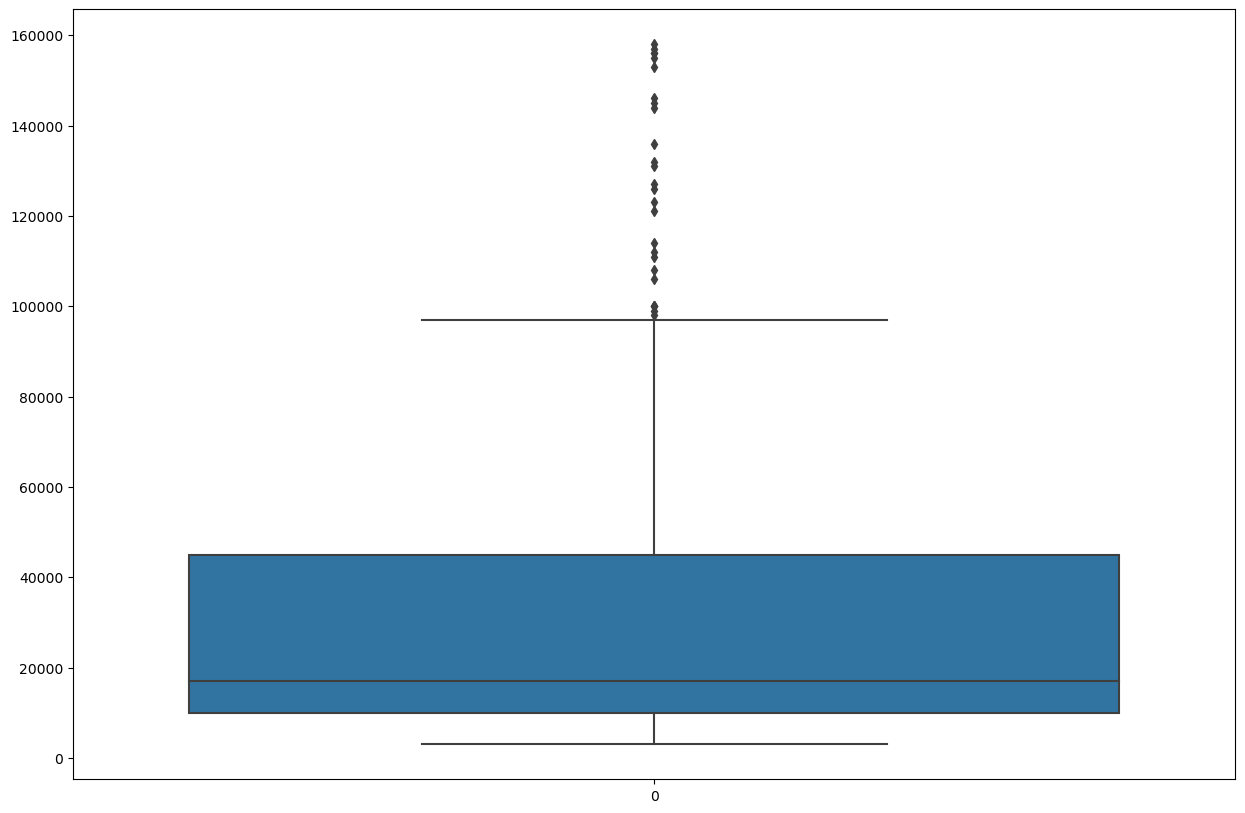

In [21]:
## Let's visualize the graph after outlier treatment

plt.figure(figsize=(15, 10))

sns.boxplot(data['Avg_Credit_Limit'], orient = 'v')
plt.show()

In [22]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [23]:
data.shape

(638, 5)

In [24]:
# Make a copy of Original Dataframe

df = data.copy()
df.shape

(638, 5)

#### Standardization

Before clustering, we should always scale the data, because, different scales of features would result in unintentional importance to the feature of higher scale while calculating the distances.

In [25]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(data)

In [26]:
std_data

array([[ 2.37167278, -1.24222947, -0.89443095, -0.53765118, -1.28136884],
       [ 0.66697118, -0.76102583, -1.51068035,  2.99865246,  1.85888719],
       [ 0.66697118,  1.16378875, -0.89443095,  0.24819407,  0.11430051],
       ...,
       [ 2.33757875,  2.60739968, -0.89443095,  2.99865246, -1.28136884],
       [ 1.82616827,  2.60739968, -0.89443095,  4.17742033, -0.58353417],
       [ 3.90590423,  1.64499239, -0.89443095,  2.60572983, -0.9324515 ]])

In [27]:
std_data_x = np.copy(std_data)

## Apply K-Means Clustering Algorithms

In [31]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import cluster 
from sklearn.cluster import SpectralClustering

### Determining Number of Clusters with Elbow Method

In [32]:
wcss = []
cluster_list = range(1, 12)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 40)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)

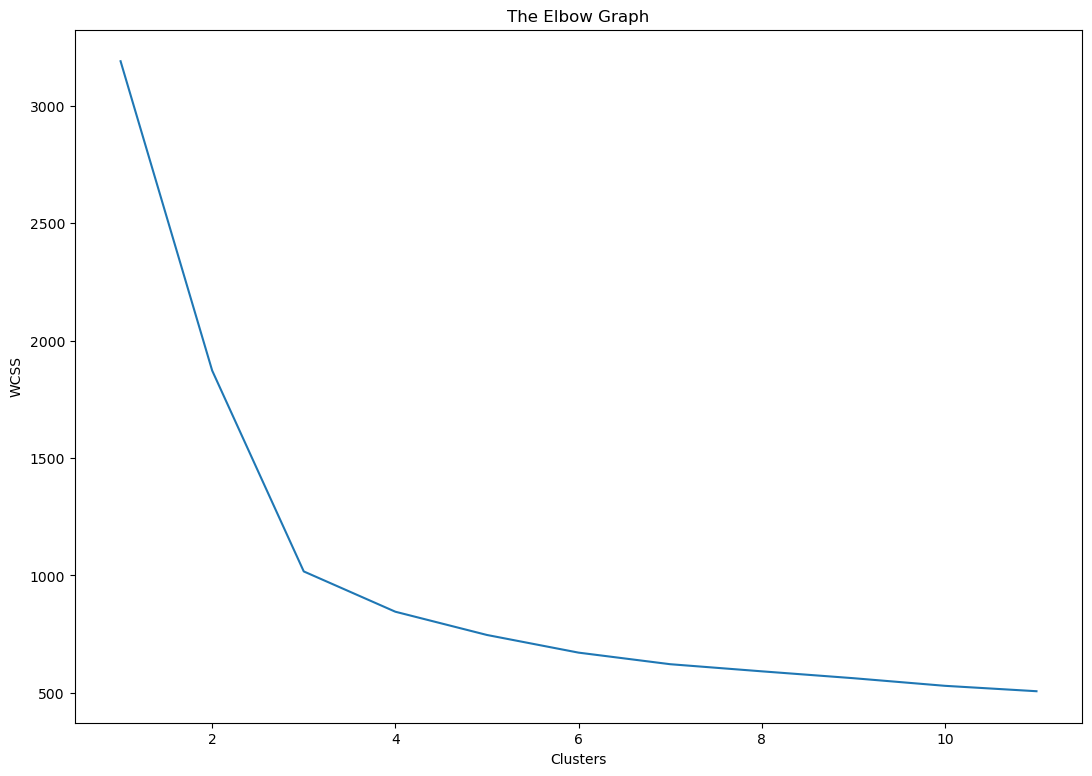

In [33]:
plt.figure(figsize=(13, 9))
plt.plot(cluster_list, wcss)
plt.title('The Elbow Graph')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

Now we can see that elbow is bend at cluster no. 3, so we can say that for this particular dataset we can choose 3 clusters.

#### Cross Check to Determine the Number of Clusters with Silhouette Scores Method

In [34]:
kmeans_values=[]

for cluster in range(2,12):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(std_data)
    sil_score = metrics.silhouette_score(std_data, kmeans, metric='euclidean')
    print("For n_clusters = {}, the silhouette score is {})".format(cluster, sil_score))
    kmeans_values.append((cluster,sil_score))

For n_clusters = 2, the silhouette score is 0.43432903166637143)
For n_clusters = 3, the silhouette score is 0.503352243228426)
For n_clusters = 4, the silhouette score is 0.3598205712337584)
For n_clusters = 5, the silhouette score is 0.334066792552443)
For n_clusters = 6, the silhouette score is 0.2509638798862458)
For n_clusters = 7, the silhouette score is 0.24530243302799165)
For n_clusters = 8, the silhouette score is 0.23730712152848668)
For n_clusters = 9, the silhouette score is 0.22006783323733123)
For n_clusters = 10, the silhouette score is 0.21932236041198705)
For n_clusters = 11, the silhouette score is 0.21645166382972075)


Again with silhouette analysis we can clearly observe that silhouette score is high when we have 3 clusters.

***Let's build the model with K=3 based on the Elbow Curve and Silhouttee Score.***

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 42)

In [36]:
y = kmeans.fit_predict(std_data)
y

array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [37]:
kmeans.cluster_centers_

array([[-0.62266602, -1.04459226, -0.93569765,  0.46570481,  1.11588018],
       [ 0.10798971,  0.44450268,  0.64296612, -0.54690852, -0.58170737],
       [ 3.069535  ,  2.00589513, -1.12552447,  3.26878676, -0.8670295 ]])

#### **Cluster Profiling with K-Means Clustering Method**

In [38]:
data['K_means_segments'] = kmeans.labels_

In [39]:
data['K_means_segments'].value_counts()

1    382
0    224
2     32
Name: K_means_segments, dtype: int64

In [41]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


In [42]:
data['K_means_segments'] = kmeans.labels_
cluster_profile = data.groupby('K_means_segments').mean()
cluster_profile['No. of Customers'] = data.groupby('K_means_segments')['Avg_Credit_Limit'].count().values
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,No. of Customers
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33604.712042,5.505236,3.494764,0.976440,2.005236,382
2,120468.750000,8.750000,0.625000,10.687500,1.187500,32


### **Insights**

- *If we look at the data we see that there is a group which prefers online interactions with their bank, they have a much higher credit limit and also have more credit cards (cluster - 2), but this group has minimum no. of customers (32).*
- *The customers who prefer in-person interactions tend to have the mid-range of credit cards and credit limit (cluster - 1) and this group has highest number of customers (382).*
- *The customers who contact via phonecall are in another segment, who have lowest credit limit and number of cards (cluster - 0).*

## Hierarchical Clustering

In [44]:
siliuette_list_hierarchical = []

for cluster in range(2,15,1):
    for linkage_method in ['single','average', 'complete', 'ward']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, metric = 'euclidean', n_clusters=cluster).fit_predict(std_data)
        sil_score = metrics.silhouette_score(std_data, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['clusters', 'sil_score','linkage_method', 'number_of_clusters'])

In [45]:
df_hierarchical.sort_values('sil_score', ascending=False)

,clusters,sil_score,linkage_method,number_of_clusters
2,2,0.573389,complete,2
1,2,0.573389,average,2
7,3,0.503432,ward,3
6,3,0.501480,complete,3
9,4,0.468561,average,4
13,5,0.443698,average,5
3,2,0.434297,ward,2
17,6,0.432723,average,6
4,3,0.395545,single,3
11,4,0.339481,ward,4


***Let's build the model with K=2 based on the Silhouttee Score.***

In [46]:
hierarchical_= AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=2).fit_predict(std_data)

### **Cluster Profiling based on Agglomerative Clustering**

In [47]:
df['Agglomerative_Segments'] = hierarchical_
cluster_profile = df.groupby('Agglomerative_Segments').mean()
cluster_profile['No. of customers'] = df.groupby('Agglomerative_Segments')['Avg_Credit_Limit'].count().values
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,No. of customers
Agglomerative_Segments,,,,,,
0,25683.168317,4.361386,2.547855,1.929043,3.80363,606
1,120468.750000,8.750000,0.625000,10.687500,1.18750,32


### **Insights**

- If we look at the data we see that there is a group which prefers online interactions with their bank, they have a much higher credit limit (~1,20,000K) and also have more credit cards (cluster - 1) and this group is having just 32 customers.
- The customers who prefer in-person interactions tend to have the low-range of credit cards (~25,000K)and credit limit (cluster - 0) and this group has 606 customers.


## Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights

In [48]:
kmeans_      = KMeans(n_clusters=3, random_state=40).fit_predict(std_data)

In [49]:
hierarchical_= AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=2).fit_predict(std_data)

In [50]:
kmeansSilhouette_Score        = metrics.silhouette_score(std_data, kmeans_, metric='euclidean')

Hierarchical_Silhouette_Score = metrics.silhouette_score(std_data, hierarchical_, metric='euclidean')

In [51]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], ['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.573389
0,KMeans,0.503352


***The Hierarchical method seems more suitable with a high silhouette score, after checking clusters and the number of variables in each cluster***

# **Actionable insights and Recommendations**

### **There appears to be three distinct categories of customers:**

1. *In-person users: prefer to handle bank transactions in person. They have the medium number of credit cards and the medium available credit. They are also the most active users.*
2. *Phone users: prefer verbally handling transactions. They have fewest credit cards and lowest credit card limit.*
3. *Online users: prefer digital transactions. They also have the most credit cards and the highest available credit. Least number of customers have this type of behaviour.*

***The customer preferences should be used to contact the customers. Online/phone users will probably prefer email/text notifications, while in-person users prefer mail notifications and upselling (when at the bank location).***

***Also, the phone and in-person customers should be reached out to promote online banking.***

### ***So, overall one very important suggestion which I need to give to my client improve their online services and reach more customers via email/messages rather than phone calls.*** 